In [18]:
import os
import pandas as pd
import numpy as np
from glob import glob

import sys
sys.path.insert(1, '../') 

from src import gene_expression, plot_mC

# Get TSSs of highly expressed genes in a given cell type

In [7]:
rna = '/cndd2/jchien/project/CZI_human/pseudobulk_rna/logcpm/L*combinesample_log2cpm+1.tsv.gz'
genedir = '/home/AD/rkgadde/L1IP/gene_data'
annotdir = '/home/AD/rkgadde/L1IP/hg38_data/annotations'

ann = f'{annotdir}/gencode.v46.basic.annotation.sorted.protein_coding_genes.gff3'
tss = f'{annotdir}/gencode.v46.basic.annotation.protein_coding_TSS.bed'

In [8]:
genes = gene_expression.get_expressed_genes(rna, 15, 9) # CPM > 15 in all samples
genes = genes[genes.duplicated(keep=False)].drop_duplicates() # genes expressed in multiple cell types
np.savetxt(f'{genedir}/Exc_expressed_genes.txt', genes, fmt='%s')

In [9]:
# Get TSSs for protein-coding genes that are robustly expressed in excitatory neurons
!grep -f {genedir}/Exc_expressed_genes.txt -o {ann} | sort | uniq | \
    grep -f - {tss} | grep -E -v 'chr[A-Z]+' > {genedir}/Exc_expressed_TSS.bed

# Plot mC and hmC around TSSs of expressed genes

In [31]:
mc = pd.read_parquet('/home/AD/rkgadde/L1IP/mC_data/CZI/class/mC/binc-20.TSS.all_samples.parquet.gz')
hmc = pd.read_parquet('/home/AD/rkgadde/L1IP/mC_data/PsychENCODE/mC/binc-20.TSS.all_samples.parquet.gz')

In [33]:
hmc['seq'] = hmc['sample'].str.extract(r'^([OX]*BS)')
hmc['sample'] = hmc['sample'].str.extract(r'^[OX]*BS_(.*)')

In [35]:
mc_sum = plot_mC.aggregate_mC(mc, ['ctxt','bin','celltype'])
hmc_sum = plot_mC.aggregate_mC(hmc, ['seq','ctxt','bin','celltype'])

In [36]:
hmc_sum = hmc_sum.loc['BS'] - hmc_sum.loc['OXBS']

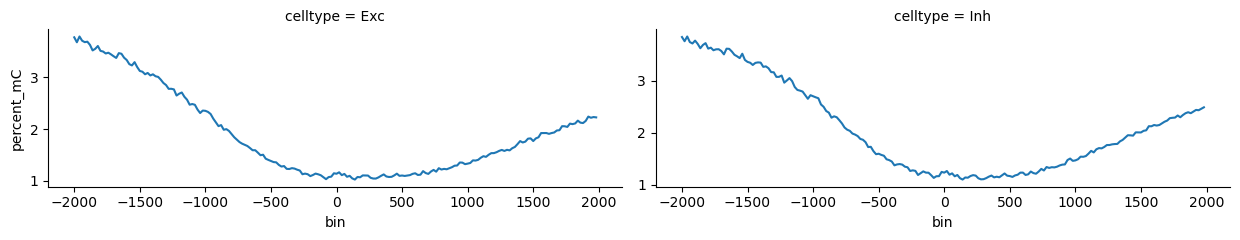

In [37]:
g = plot_mC.plot_mC(mc_sum.loc['mCHN'], hue=None, hue_order=None, palette=None, col='celltype', col_order=['Exc','Inh'])

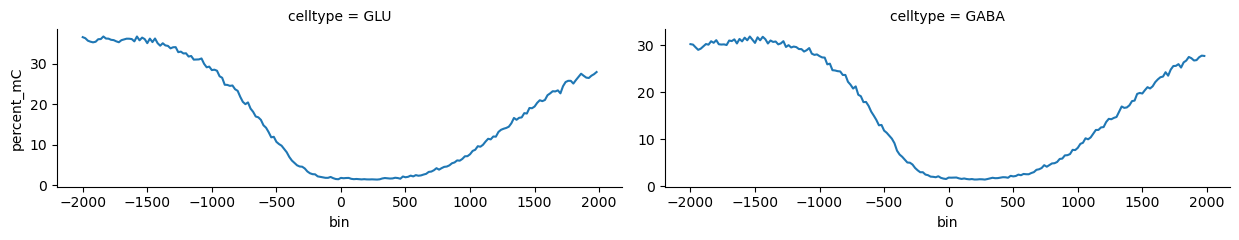

In [38]:
g = plot_mC.plot_mC(hmc_sum.loc['mCGN'], hue=None, hue_order=None, palette=None, col='celltype', col_order=['GLU','GABA'])